# Actividades de clase, semanas 4, 5 y 6 [Segunda parte]

Practica del día 25 de junio, consta de un módulo (módulo III) que corresponde a convoluciones.

## Ayuda: Recuerde descargar el repositorio de GitHub del curso, donde estan los notebooks actualizados e implementaciones en python3.

## Aunque el ejercicio explícitamente no lo indique, recuerde que debe dar una breve conclusión de cada uno de los resultados obtenidos al finalizar cada punto.

In [4]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
import time

# Módulo III (cont.)

## 2.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. A continuación, se muestran dos funciones para creación e implementación de kernels.

## Convolución con las funciones make_kernel y apply_kernel:
Utilizando las funciones anteriores, implemente una convolución a la imagen "res/gato.jpg" con un kernel de <b>tamaño 15x15. </b>

Explique: ¿Qué hace la función make_kernel? ¿Qué hace la función apply_kernel? ¿Por qué considera usted que los bordes se ven de color negro (adquieren valor 0)

### Debe obtener un resultado como este:

<img src = "res/convog.png">

Tiempo total de la convolución  213.98646963458862 seconds


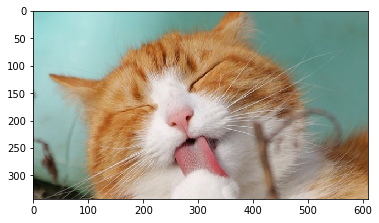

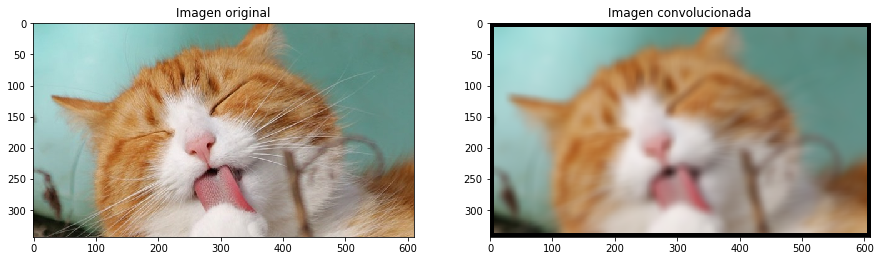

In [7]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

#Función para hacer el kernel, su parámetro es el tamaño de éste
def make_kernel(size):
    #Matriz de unos del tamaño de entrada, datos de tipo flotante
    kernel = np.ones((size,size),dtype=np.float64)
    #r corresponde al entero más grande que sea menor o igual a size/2
    r = math.floor(size/2)
    return (r,kernel/(size**2))

#Función de aplicación de kernel sobre la imagen bajo los parámetros 
#imagen de entrada, máscara, valores en x,y,kernel,r
def apply_kernel(img, res, x,y,kernel,r):
    #Recorrer la imagen en el intervalo del radio del kernel
    for i in range(-r, r+1):
        for j in range(-r, r+1):
            #Convolución sobre cada pixel de la imagen
            res[x][y] += img[x+i][y+j] * kernel[r+i][r+j]
            

            
#Leer la imagen
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(img,cmap='gray')

#Tamaño del kernel
k_size = 15
#Obtener un kernel que se ajusta al tamaño solicitado mediante la función
(r, kernel) = make_kernel(k_size)
#Crear la matriz de ceros del tamaño de la imagen de entrada, tipo de datos flotante
res = np.zeros(img.shape, dtype=np.float64)

### Implementación de la librería time
import time
##t0 para calcular el tiempo total de la convolución
t0 = time.clock()
           

#Realizar la operación convolución sobre toda la imagen de entrada
for i in range(r,img.shape[0]-r):
    for j in range(r, img.shape[1]-r):
        apply_kernel(img, res, i, j, kernel, r)

##Termina de contabilizar el tiempo de la convolución
print ("Tiempo total de la convolución ", time.clock()-t0,"seconds") 
        
#Asegurar el tipo de dato uint8
res=res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original y la convolución
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen convolucionada')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)


La función **make_kernel** toma un numero (size) y devuelve una matriz del tamaña sizexsize y un numero r, el cual corresponde al entero más grande que sea menor o igual a size/2. La matriz que devuelve make_kernel primero se define como una matriz de unos de datos tipo flotante, los cuales posteriormente son normalizados a partir de size**2

La función **apply_kernel** se encarga de hacer la convolusión de la imagen punto a punto, para esto recibe como parametros la imagen que se desea hacer la convolución, el objeto donde se almacenara el resultado de la convolución, las coordenadas x,y del punto dodne se realiza la convolución (la función apply_kernel va punto a punto en (casi) toda la imagen) el kernel y el radio r el cual dice cuantos pixeles al rededor del punto x,y tendra encuenta la función para aplicar la convolución. Estos ultimos parametros son resultados de la función make_kernel
Esta función recorre todos los pixeles al rededor del punto x,y en un radio r (r hacia la derecha, izquierda, arriba y abajo del punto central) y reealiza la convolución, es decir, para el objeto resultante res, en el punto x,y almacena la sumatoria del producto (pixel x kernel) aplicado a todos los pixeles en un radio de r al rededor del punto x,y.  

Los **bordes se ven en negro** por que la operación se de convolución se realiza desde el punto (r,r) y va hasta el punto (img_original_size(x)-r,img_original_size(y)-r) en la imagen y como res en principio se definio como una matriz de ceros con un tamaño (img_original_size(x),img_original_size(y)). Producto del punto de origen y punto final de la convolución en la imagen, queda un borde de tamaño r que sn pixeles en 0, por eso son negros.

## Convolución con Filter2D:

Utilizando la misma imagen ("res/gato.jpg"), con un kernel de <b> tamaño 15x15 </b>, realice el proceso de convolución, esta vez haga uso de la función cv2.filter2D (utilice el parámetro borderType = cv2.BORDER_REPLICATE).


### Debe obtener un resultado como este:

<img src = "res/conv.png">

# Mida la eficiencia de ambos procesos, utilizando la librería time de python.

¿Cuanto tarda cada caso de convolución implementado?

Tiempo total de la convolución  0.3631481589474106 seconds


Text(0.5,1,'Imagen Salida')

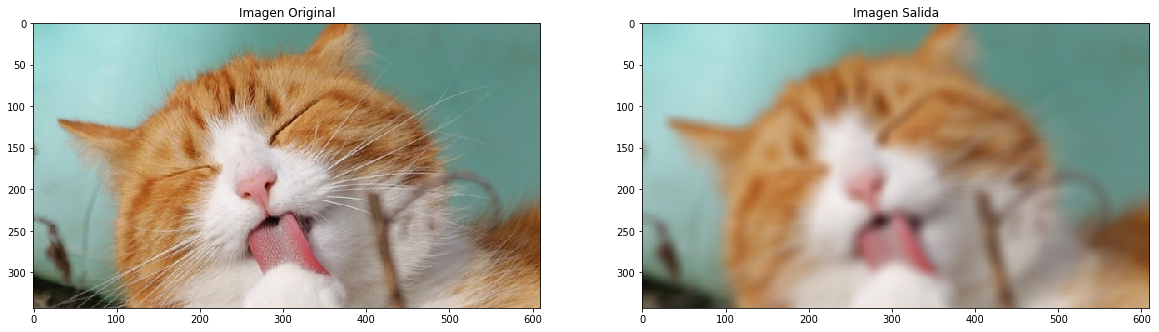

In [8]:
#Importar librerias
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#Leer la imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Crear un kernel de tamaño 15
k_size = 15
kernel = np.ones((15,15),np.float64)/225

### Implementación de la librería time
import time
##t0 para calcular el tiempo total de la convolución
t0 = time.clock()

#Aplicar filter2D sobre la imagen y el kernel arbitrario, bajo la alternativa de borde preferida
res = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

##Termina de contabilizar el tiempo de la convolución
print ("Tiempo total de la convolución ", time.clock()-t0,"seconds") 

#Mostrar la imagen original y la imagen bajo filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,2,2)
plt.imshow(res,cmap='gray')
plt.title("Imagen Salida")

In [9]:
### Implementación de la librería time
import time

t0 = time.clock()
##aquí van todos los procesos que usted desea cuantificar
print (time.clock()-t0,"seconds")

4.1987893496298057e-05 seconds


## CONCLUSIÓN:

Aplicar la convolución es mucho más eficiente al utilizar la libreria OpenCV con su función cv2.filter2D(params) que al desarrollar una función particular para hacer la convolución (reinventar la rueda). Seguramente, OpenCV ya tiene muchos procesos optimizados que hacen menos demorado el proceso. Ademas, la función filter2D permite tratar de diferentes maneras los bodes, entre ellas conservarlos.

Tiempo total de la convolución sin función filter2D de OpenCV 216.88191075040868 seconds
Tiempo total de la convolución con función filter2D de OpenCV 0.012505411780693976 seconds

## 3.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res" en RGB. En este ejercicio usted debe recrear distintos tipos de ruido que se presentan en imágenes.

El ruido es un factor que se encuentra en la mayoría de los problemas de visión artificial, utilizando las funciones de ruido Gaussiano, Pimienta y Poisson, obtenga:

<img src = "res/gatoxf.png">

A continuación se muestra la implementación de las funciones:

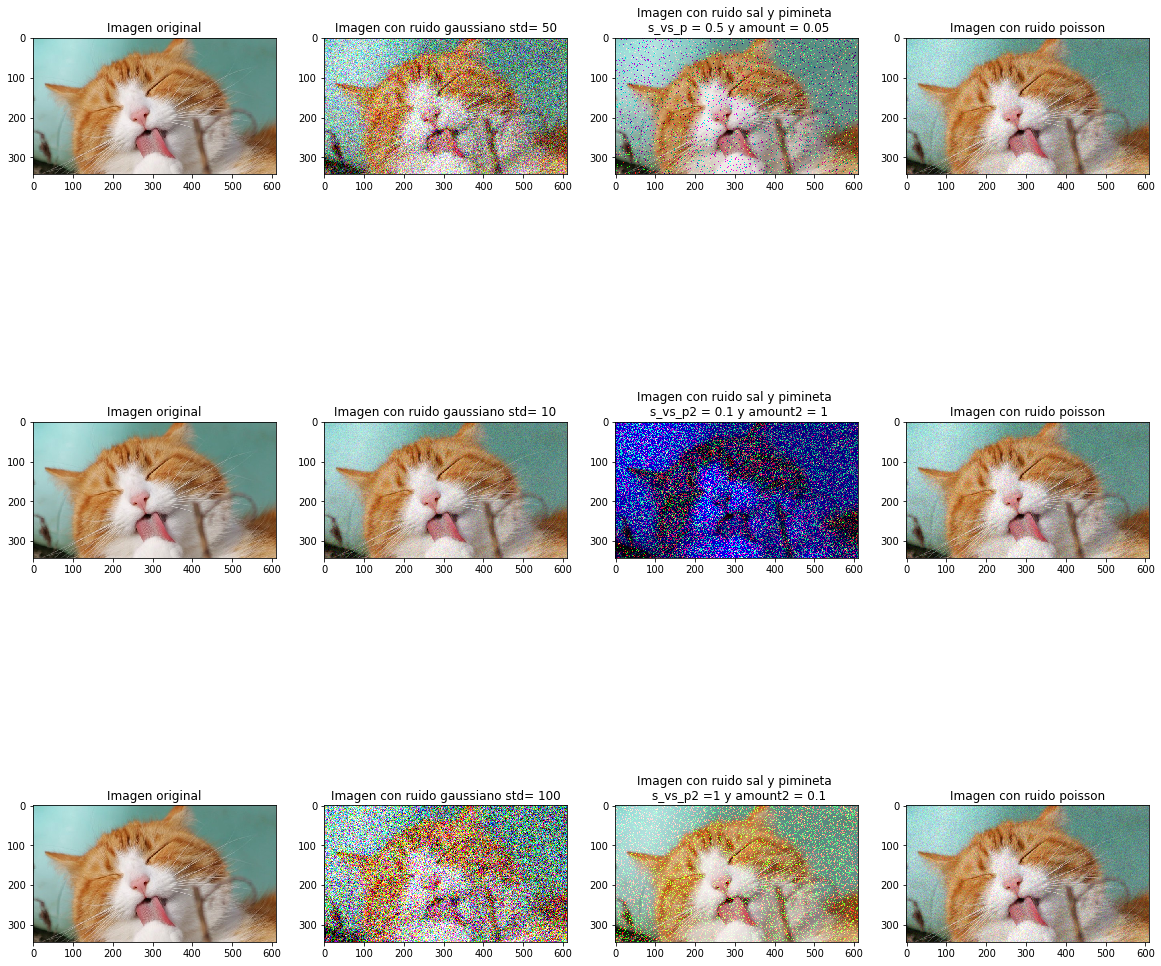

In [13]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np


#Definir la función ruido gaussiano
def gaussian_noise(img, std):
    #Las variables row, col y ch dependen de la imagen de entrada y sus componentes
    mean = 0
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1       
    #Definir la matriz de ceros noisy  del mismo tamaño que la imagen original
    noisy = np.zeros(img.shape, np.float64)
    #Generar una distribución normal a partir del comando de numpy
    gauss = np.random.normal(mean,std,(row,col,ch)) if ch > 1 else np.random.normal(mean,std,(row,col))
    gauss = gauss.reshape(row,col,ch)               if ch > 1 else gauss.reshape(row,col)
    #La imagen con ruido gaussiano es la suma de la imagen de entrada con la procesada
    noisy =  img + gauss
    #Ajustar los datos para que estén entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy



#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p, amount):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy



#Definir la función ruido de Poisson
def poisson_noise(img):
    
    #Se aplica el comando de numpy random.poisson a la imagen de entrada
    noisy = np.random.poisson(img) 
    #Los valores deben estar entre 0 y 255
    noisy[noisy<0] = 0
    noisy[noisy>255] = 255
    return noisy



#leer imagen
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)

#Escribir la desviación estandar y leer la imagen a color
std = 50
std2 = 10
std3 = 100

#Aplicar ruido gaussiano y darle tipo de dato uint8
res11 = gaussian_noise(img, std)
res11 = res11.astype(np.uint8)

res12 = gaussian_noise(img, std2)
res12 = res12.astype(np.uint8)

res13 = gaussian_noise(img, std3)
res13 = res13.astype(np.uint8)

#---------------------
#np.random.uniform()
#Dar valores a los parámetros de entrada de la función ruido
s_vs_p = 0.5
amount = 0.05

s_vs_p2 = 0.1
amount2 = 1

s_vs_p3 = 1
amount3 = 0.1

#Leer imagen de entrada
#img = img_read('res/ruido/mountains.jpg', 'gray')
#Aplicar la función ruido y volver el tipo de dato uint8
res21 = sp_noise(img, s_vs_p, amount)
res21 = res21.astype(np.uint8)

res22 = sp_noise(img, s_vs_p2, amount2)
res22 = res22.astype(np.uint8)

res23 = sp_noise(img, s_vs_p3, amount3)
res23 = res23.astype(np.uint8)

#-----------------------
#dist_width = 1
#Aplicar ruido de Poisson a la imagen y volver al tipo de dato uint8
res3 = poisson_noise(img)
res3 = res3.astype(np.uint8)



#Generar un subplot 1x2 para mostrar la imagen original y la imagen con ruido gaussiano
fig, arreglo_plots = plt.subplots(3,4, figsize=(20, 20))

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray",vmin=0, vmax=255)

arreglo_plots[0,1].set_title('Imagen con ruido gaussiano std= 50')
arreglo_plots[0,1].imshow(res11, cmap="gray",vmin=0, vmax=255)

arreglo_plots[0,2].set_title('Imagen con ruido sal y pimineta \n s_vs_p = 0.5 y amount = 0.05')
arreglo_plots[0,2].imshow(res21, cmap="gray",vmin=0, vmax=255)

arreglo_plots[0,3].set_title('Imagen con ruido poisson')
arreglo_plots[0,3].imshow(res3, cmap="gray",vmin=0, vmax=255)


arreglo_plots[1,0].set_title('Imagen original')
arreglo_plots[1,0].imshow(img, cmap="gray",vmin=0, vmax=255)

arreglo_plots[1,1].set_title('Imagen con ruido gaussiano std= 10')
arreglo_plots[1,1].imshow(res12, cmap="gray",vmin=0, vmax=255)

arreglo_plots[1,2].set_title('Imagen con ruido sal y pimineta \n s_vs_p2 = 0.1 y amount2 = 1')
arreglo_plots[1,2].imshow(res22, cmap="gray",vmin=0, vmax=255)

arreglo_plots[1,3].set_title('Imagen con ruido poisson')
arreglo_plots[1,3].imshow(res3, cmap="gray",vmin=0, vmax=255)


arreglo_plots[2,0].set_title('Imagen original')
arreglo_plots[2,0].imshow(img, cmap="gray",vmin=0, vmax=255)

arreglo_plots[2,1].set_title('Imagen con ruido gaussiano std= 100')
arreglo_plots[2,1].imshow(res13, cmap="gray",vmin=0, vmax=255)

arreglo_plots[2,2].set_title('Imagen con ruido sal y pimineta \n s_vs_p2 =1 y amount2 = 0.1')
arreglo_plots[2,2].imshow(res23, cmap="gray",vmin=0, vmax=255)

arreglo_plots[2,3].set_title('Imagen con ruido poisson')
arreglo_plots[2,3].imshow(res3, cmap="gray",vmin=0, vmax=255)


## CONCLUSIÓN:

Cuando se aplica el ruido gaussiano, al aumentar el parametro de std aumenta el ruido, lo cual se puede evidenciar en las figuras de la segunda columna.  Para el ruido de sal y pimienta, ademas de tene run ruido granular, tambien se afectan los colores de la imagen llegando a tener tonos amarillos (cuando s_vs_p=1 y amount=1) y azules (cuando s_vs_p=0.1 y amount=1). El ruido poisson no tiene parametros para variar y a simple vista su afectación es menor que sal y pimienta y el gaussiano

## Sugerencia: Ajuste los parámetros std = 50, s_vs_p =  0.5, amount = 0.05

## No olvide variar los parámetros y observar qué ocurre al hacerlo.

## 4.

Lea la imagen 'res/rice.png'. Aplique 100 veces sucesivas un filtro de media de 3x3 a la imagen. ¿Qué resultado obtuvo?, ¿Qué comentarios puede hacer al respecto?

Ahora aplique 100 veces un filtro de media de 11x11 a la imagen. Compare y discuta los resultados obtenidos comparados con la imagen anterior.

¿Qué ocurre si el filtro 3x3 se aplica únicamente 2 veces? ¿Qué ocurre con 10? ¿Qué pasaría si se aplica un filtro de media infinitas veces a la imagen? 

## Ayuda:

Cuando aplique 100 veces el filtro de media 3x3 debe obtener lo siguiente:

<img src = "res/scenario.png">

###  Implementación del filtro:

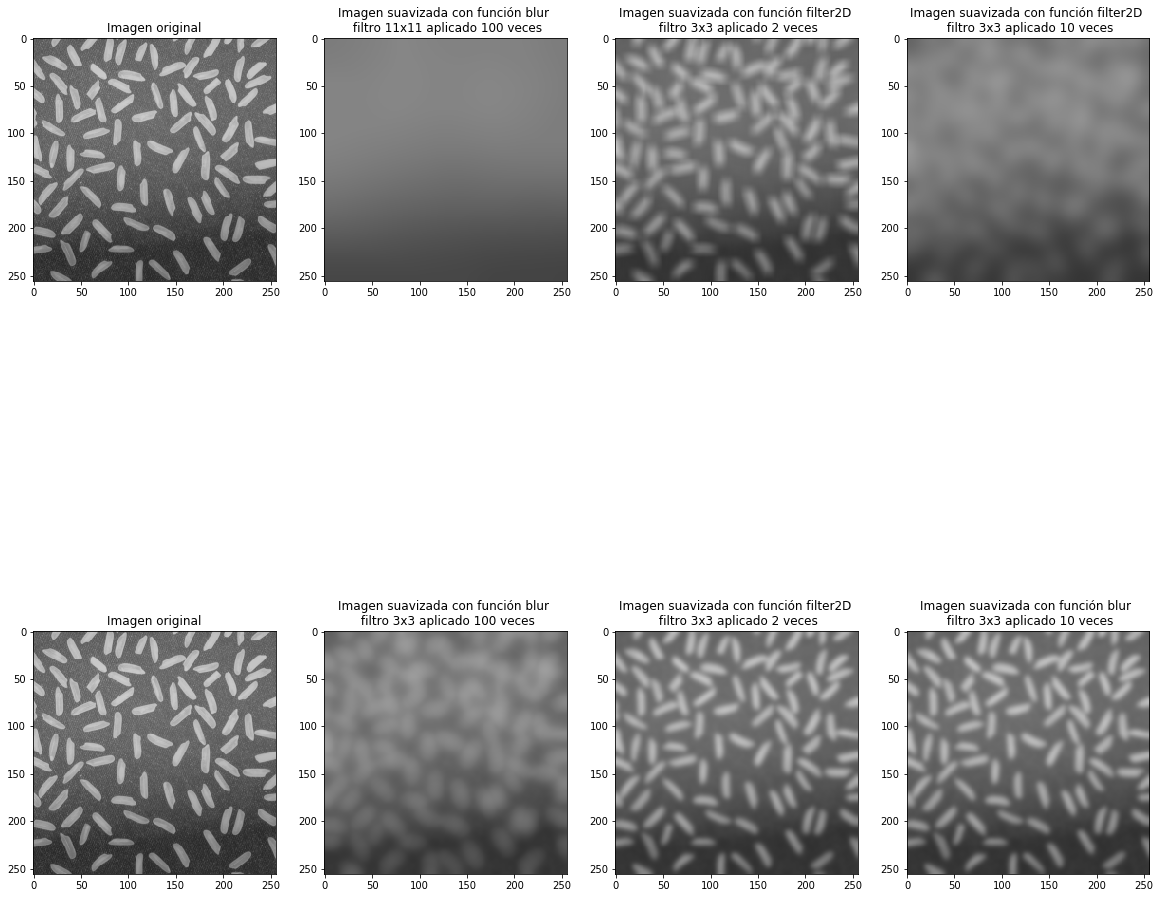

In [36]:

#Importar librerías
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

#kenerl 11x11
#Leer la imagen de entrada
img = img = cv2.cvtColor(cv2.imread('res/rice.png'), cv2.COLOR_BGR2RGB)

#Dar valor al tamaño del kernel
k_size = 11

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse 100 veces
for i in range (100):
    if i == 1:
        res11 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )
    else:
        res11 = cv2.blur(res11,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )

#Aplicar el suavizado mediante filter2D 2 veces
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
for i in range (2):
    if i == 1:
        res12 = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    else:
        res12 = cv2.filter2D(res12, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
            

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse 10 veces
for i in range (10):
    if i == 1:
        res13 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )
    else:
        res13 = cv2.blur(res13,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )
        
##Kernel 3x3
#Dar valor al tamaño del kernel
k_size = 3

#Aplicar el suavizado mediante filter2D 100 veces
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
for i in range (100):
    if i == 1:
        res21 = cv2.filter2D(img, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)
    else:
        res21 = cv2.filter2D(res21, ddepth=-1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse 10 veces
for i in range (10):
    if i == 1:
        res22 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )
    else:
        res22 = cv2.blur(res22,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )


#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse 10 veces
for i in range (10):
    if i == 1:
        res23 = cv2.blur(img,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )
    else:
        res23 = cv2.blur(res23,(k_size,k_size),borderType=cv2.BORDER_REPLICATE )


fig, arreglo_plots = plt.subplots(2,4, figsize=(20, 20))

arreglo_plots[0,0].set_title('Imagen original')
arreglo_plots[0,0].imshow(img, cmap="gray")

arreglo_plots[0,1].set_title('Imagen suavizada con función blur \n filtro 11x11 aplicado 100 veces')
arreglo_plots[0,1].imshow(res11, cmap="gray")

arreglo_plots[0,2].set_title('Imagen suavizada con función filter2D \n filtro 3x3 aplicado 2 veces')
arreglo_plots[0,2].imshow(res12, cmap="gray")

arreglo_plots[0,3].set_title('Imagen suavizada con función filter2D \n filtro 3x3 aplicado 10 veces')
arreglo_plots[0,3].imshow(res13, cmap="gray")

arreglo_plots[1,0].set_title('Imagen original')
arreglo_plots[1,0].imshow(img, cmap="gray")

arreglo_plots[1,1].set_title('Imagen suavizada con función blur \n filtro 3x3 aplicado 100 veces')
arreglo_plots[1,1].imshow(res21, cmap="gray")

arreglo_plots[1,2].set_title('Imagen suavizada con función filter2D \n filtro 3x3 aplicado 2 veces')
arreglo_plots[1,2].imshow(res22, cmap="gray")

arreglo_plots[1,3].set_title('Imagen suavizada con función blur \n filtro 3x3 aplicado 10 veces')
arreglo_plots[1,3].imshow(res23, cmap="gray")


## CONCLUSIÓN:

con el filtro de 11x11 se hace necesario menoss iteraciónes para afectar (suavizar) la imagen la mayor mediad, en comparacion con el filtro 3x3. Por ejemplo, la aplicación del filtro 11x11 10 veces es apenas comparable con la aplicación de 3x3 100 veces y la diferencia entre suavizado de lla aplicación del filtro entr 2 y 10 veces es mucho mayor para el filtro de 11x11  que para el filtro 3x3. Si se aplicara un filtro de media infinitas veces se consigue algo muy parecido a la aplicación del filtro 11x11 100 veces, donde todos los bordes han sido suavizados casi por completo y solos e vera un fondo gris

## 5.

Utilice la función de ruido sal y pimienta (sp_noise), con s_vs_p = amount = 0.7.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", introduzcala en la función de ruido pimienta y posteriomente, aplique un filtro de mediana con kernel de tamaño 7x7.

<img src = "res/filter.png">

Recuerde utilizar la función cv2.medianBlur.

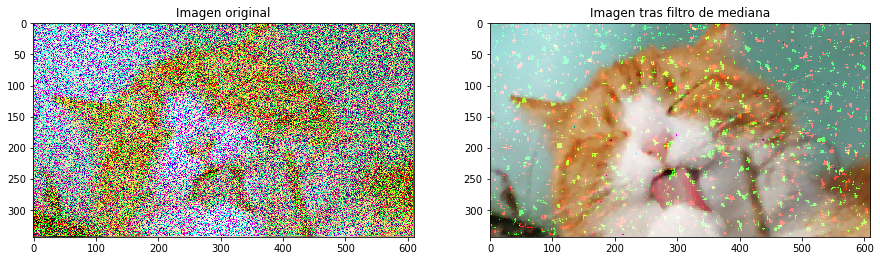

In [5]:
#Importar librerias
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
import numpy as np

#Definir la función de ruido impulsivo
def sp_noise(img, s_vs_p = 0.5, amount = 0.004):
    
    #Obtener los valores de row, col y ch con base en la imagen de entrada
    row = img.shape[0]
    col = img.shape[1]
    ch =  img.shape[2] if len(img.shape) == 3 else 1  
    
    #Crear una copia de la imagen para volverla ruidosa
    noisy = img.copy()
    
    # Salt mode
    
    #Multiplica los parámetros con el tamaño de la imagen, los redondea al mínimo entero
    num_salt = np.ceil(amount * img.size * s_vs_p)
    #Genera el vector coordenadas en la imagen de copia usando la función randint de numpy
    coords = [np.random.randint(0, i - 1, int(num_salt))
          for i in img.shape]

    #La imagen evaluada en el vector coords se satura
    noisy[coords] = 255
    
    # Pepper mode
    
    #Se multiplican los parámetros por el tamaño de la imagen, variando s_vs_p
    num_pepper = np.ceil(amount* img.size * (1. - s_vs_p))
    #Generar el vector coords utilizando randint
    coords = [np.random.randint(0, i - 1, int(num_pepper))
          for i in img.shape]
    #La imagen en el vector coords se satura en color negro
    noisy[coords] = 0
    return noisy

#np.random.uniform()
#Dar valores a los parámetros de entrada de la función ruido
s_vs_p = 0.7
amount = 0.7


#Leer imagen de entrada
img = cv2.cvtColor(cv2.imread('res/gato.jpg'), cv2.COLOR_BGR2RGB)
#Aplicar la función ruido y volver el tipo de dato uint8
res = sp_noise(img, s_vs_p, amount)
res = res.astype(np.uint8)


#Definir tamaño del kernel
k_size = 7
#Aplicar filtro de mediana a la imagen de entrada
res1= cv2.medianBlur(res, k_size)



#Generar un subplot 1x2 para mostrar imagen original e imagen con ruido sal y pimienta
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(res, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de mediana')
arreglo_plots[1].imshow(res1, cmap="gray", vmin=0, vmax=255)

## CONCLUSIÓN:

El ruido que se le provoco a la imagen con la funcion de sal y pimienta la afecto demasiado, el filtro de media de kernel 7x7 recupero muchoi la imagen, agrupando en puntos espcificos el ruido y no alcanza a suavizarla demasiado para perder los detalles relevantes de la foto